#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [2]:
# Read CSV
df = pd.read_csv('https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
df.duplicated().sum()

3

In [4]:
df = df.drop_duplicates()
df.duplicated().sum()

0

Periksa apakah ada missing values

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Periksa outlier dengan boxplot untuk setiap kolom feature

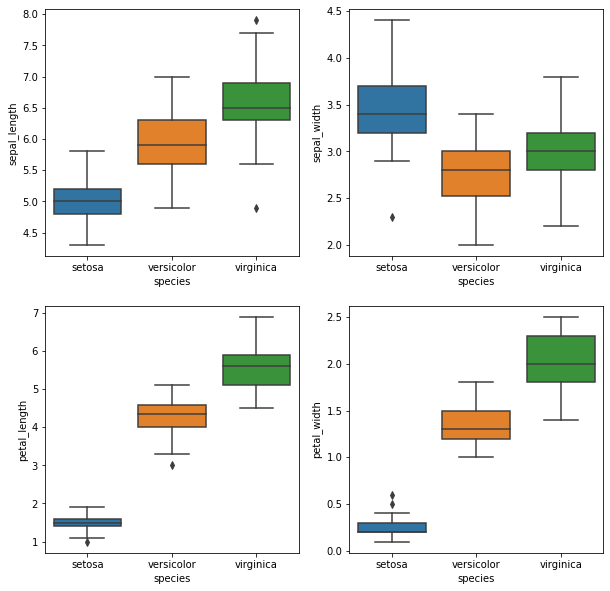

In [6]:
fig, ax = plt.subplots(2,2, figsize=(10,10)) 

sns.boxplot(ax=ax[0, 0], data=df, x='species',y='sepal_length')
sns.boxplot(ax=ax[0, 1], data=df, x='species',y='sepal_width')
sns.boxplot(ax=ax[1, 0], data=df, x='species',y='petal_length')
sns.boxplot(ax=ax[1, 1], data=df, x='species',y='petal_width')

plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [7]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [11]:
y_pred = classifier.predict(X_test)
print(y_pred)

['setosa' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'setosa' 'versicolor' 'setosa']


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

ac = accuracy_score(y_test,y_pred)
print("Accuracy_score :",ac)

Confusion Matrix
 [[5 0 0]
 [0 5 0]
 [0 0 5]]
Accuracy_score : 1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

Uji hasil model dengan data test

In [14]:
y_pred = gnb.predict(X_test)
print(y_pred)

['setosa' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'setosa' 'versicolor' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

ac = accuracy_score(y_test,y_pred)
print("Accuracy_score :",ac)

Confusion Matrix
 [[5 0 0]
 [0 5 0]
 [0 0 5]]
Accuracy_score : 1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [16]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5,metric = "euclidean")
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [17]:
y_pred = classifier.predict(X_test)
print(y_pred)

['setosa' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'setosa' 'versicolor' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

ac = accuracy_score(y_test,y_pred)
print("Accuracy_score :",ac)

Confusion Matrix
 [[5 0 0]
 [0 5 0]
 [0 0 5]]
Accuracy_score : 1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

Kesimpulan dari 3 model klasifikasi di atas adalah, ketiganya memiliki akurasi skor yang sama.